 Import and Visualize the Data

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Mlrepo/Visualizing geospatial data with Matplotlib and Geopandas/synthetic_geospatial_data.csv')

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))


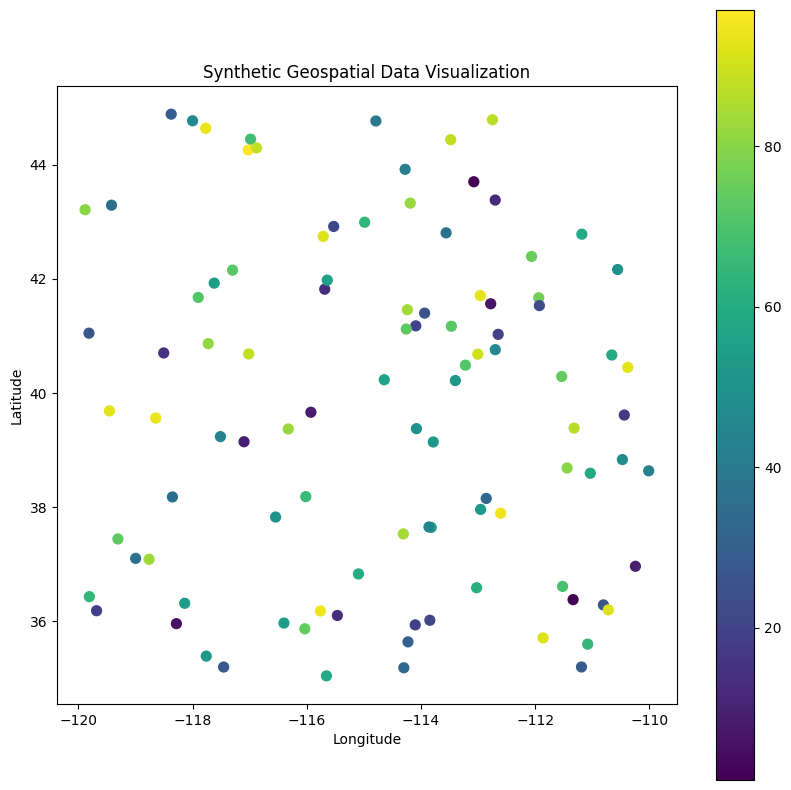

In [3]:
# Plot the geospatial data
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='value', cmap='viridis', legend=True, markersize=50)
plt.title('Synthetic Geospatial Data Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Histogram of Values

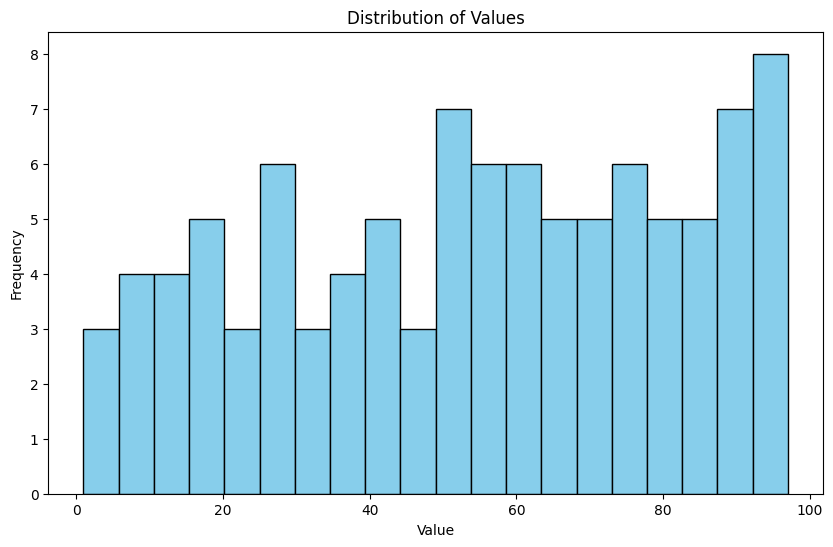

In [4]:
# Plot a histogram of the 'value' column
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Scatter Plot with Size Variation

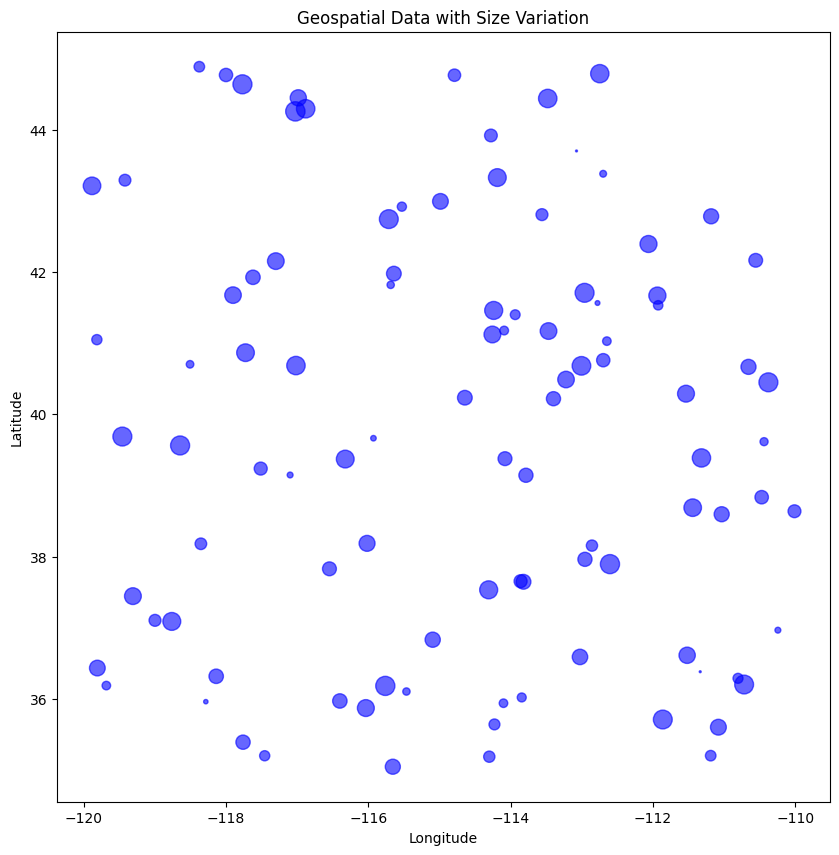

In [5]:
# Scatter plot with size variation
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(
    ax=ax,
    color='blue',
    markersize=gdf['value']*2,  # Multiply by 2 to increase visibility
    alpha=0.6
)
plt.title('Geospatial Data with Size Variation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Hexbin Plot

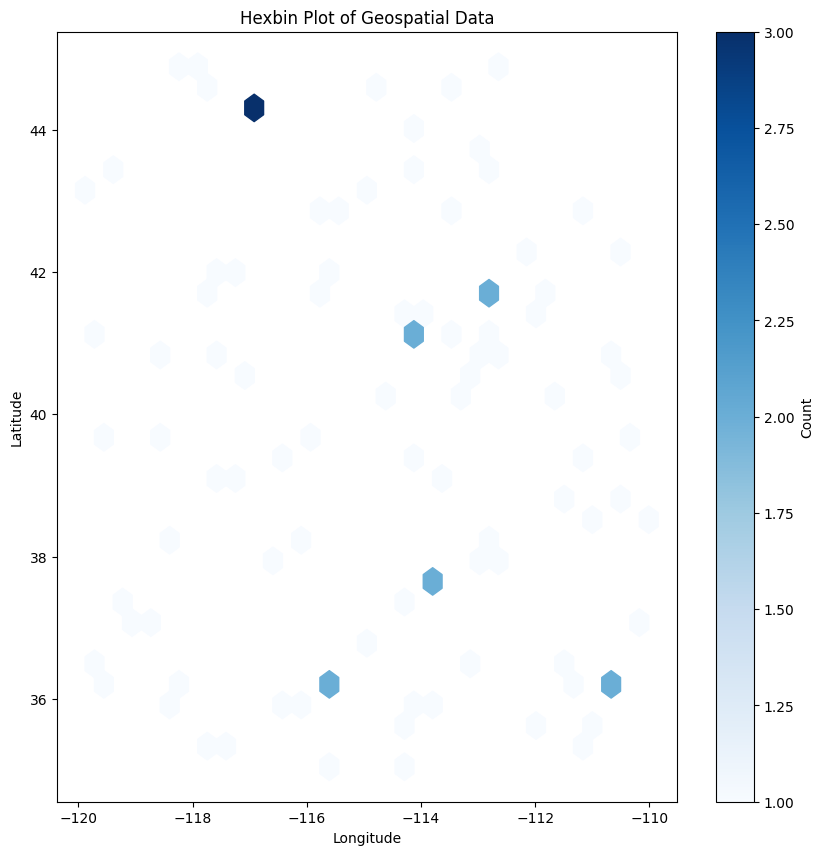

In [6]:
# Hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(df['longitude'], df['latitude'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Geospatial Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


KDE (Kernel Density Estimation) Plot

<ipython-input-7-14af7e75c1b3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


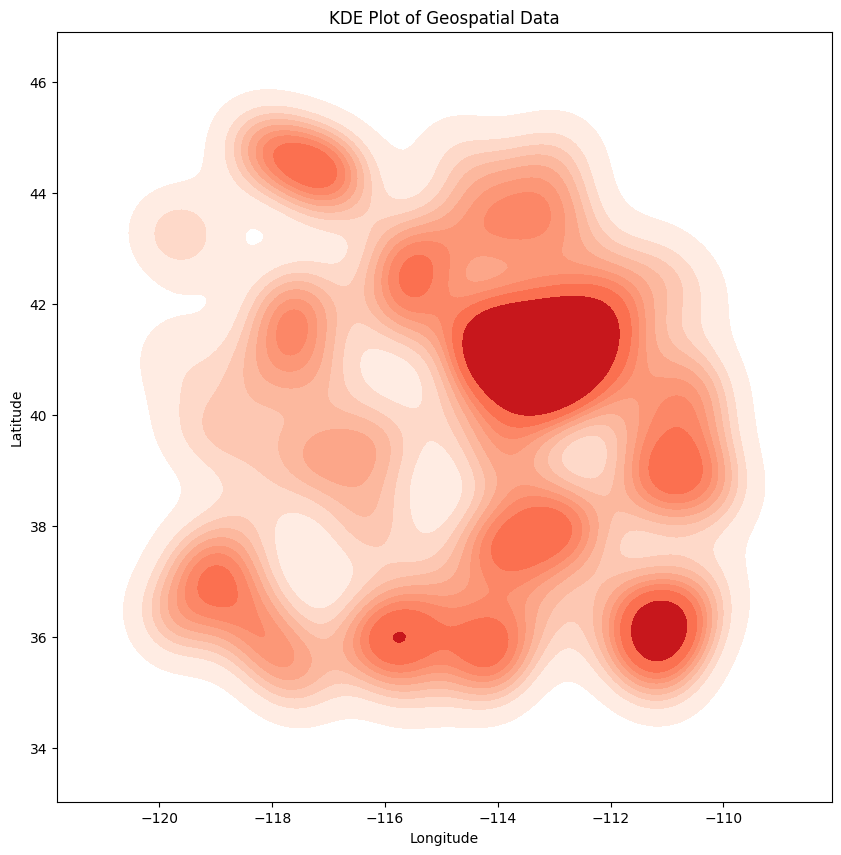

In [7]:
import seaborn as sns

# KDE plot
plt.figure(figsize=(10, 10))
sns.kdeplot(
    x=df['longitude'], y=df['latitude'],
    cmap="Reds", shade=True, bw_adjust=0.5
)
plt.title('KDE Plot of Geospatial Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Interactive Plot with Folium

In [8]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Add points to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'Value: {row["value"]}'
    ).add_to(m)

# Save the map to an HTML file
m.save('synthetic_geospatial_data_map.html')
m
